# Monty Hall Problem Simulation
There are three doors. Behind one door only is a brand new car. Behind the other two are dirty goats. Here's the game. You randomly choose one door, say the first one. Monty Hall, the host of this game, chooses a door you did not pick, opens it, and he makes sure that there is a goat behind this door. (This is always possible since there are two goats.) You then choose: do you stay with what you picked, or do you switch to the last door which neither you nor Monty Hall picked?

The surprising but correct answer is to switch. A simple argument is by counting. Say you picked the first door. Let G stand for goat and C for car. There are three possibilities: CGG, GCG, and GGC. Well, if the first case is true, then you should not switch. However, in the other two cases, you ought to switch. In fact, the probability of winning by switching is $\frac{2}{3}$, and winning without switching is $\frac{1}{3}$. The intuition is more obvious if we consider a similar game, taken from r/AskStatistics: "You have $1000$ doors, one has a car, the other $999$ have goats. You pick a door. The host then opens $998$ doors with goats behind them. Which is more likely: you picked the car the first time, or that the car is in the other door?''

I have to confess that, despite knowing the proof, the solution still felt somehow like a trick to me. I am in good company: Paul Erdös was not convinced of the solution until a computer simulation of the problem was shown to him. This notebook does exactly that; actually, it slightly generalizes the problem by giving you the choice to pick the number of doors and number of cars.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
n = 3 #number of doors
c = 1 # number of cars
rng = np.random.default_rng(10383)

In [24]:
def game(n,c, switch: bool, random: bool = False):
    car_loc = rng.integers(0,n,c)
    choice = rng.integers(0,n,1)
    
    indices = np.setdiff1d(rng.permutation(n), np.concatenate((car_loc, choice))) 
    show = np.array([indices[0]])
    
    door_left = np.setdiff1d(rng.permutation(n),np.concatenate((show, choice)))
    
    if switch:
        choice = door_left[0]
    elif random:
        choice = np.setdiff1d(rng.permutation(n),show)[0]
    
    return choice == car_loc

In [27]:
def sim(n=3, trials=10000):
    switch = np.mean([game(n,c, True, False) for _ in range(trials)])
    stay   = np.mean([game(n,c, False, False) for _ in range(trials)])
    rand   = np.mean([game(n,c, False, True) for _ in range(trials)])
    return switch, stay, rand

In [28]:
# Run the simulation and render a Markdown summary
s, t, r = sim(3, 10000)

from IPython.display import display, Markdown

display(Markdown(f"""
### Monty Hall Simulation — n = 3, trials = 10,000

- **Switching wins:** {s:.3f}  ({s*100:.1f}%)
- **Staying wins:** {t:.3f}  ({t*100:.1f}%)
- **Random choice wins:** {r:.3f}  ({r*100:.1f}%)

**Theory (n = 3):** switching ≈ 2/3, staying ≈ 1/3, random ≈ 1/2.
"""))


### Monty Hall Simulation — n = 3, trials = 10,000

- **Switching wins:** 0.662  (66.2%)
- **Staying wins:** 0.334  (33.4%)
- **Random choice wins:** 0.553  (55.4%)

**Theory (n = 3):** switching ≈ 2/3, staying ≈ 1/3, random ≈ 1/2.


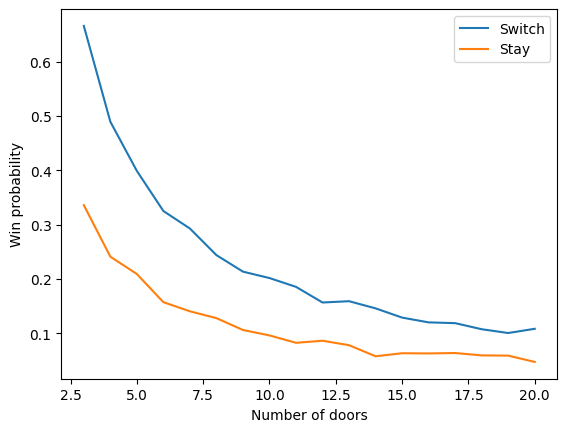

In [29]:
ns = range(3, 21)
results = [sim(n, 5000) for n in ns]

switch_probs = [r[0] for r in results]
stay_probs   = [r[1] for r in results]

plt.plot(ns, switch_probs, label="Switch")
plt.plot(ns, stay_probs, label="Stay")
plt.xlabel("Number of doors")
plt.ylabel("Win probability")
plt.legend()
plt.show()

In [31]:
from IPython.display import display, Markdown

display(Markdown(f"""
### Simulation Results Explained

The plot above shows the win probability for two strategies as the number of doors increases.
"""))


### Simulation Results Explained

The plot above shows the win probability for two strategies as the number of doors increases.
